# Function : Convert json file to mask file 、  Perform sam segmentation 
# input floder：  ../data/inputdata  (image.png + json.txt)
# output floder： newdata/(images +labels +sams)
# Some intermediate results ： ./results

In [7]:
from matplotlib import pyplot as plt
import numpy as np
import torch
import os

#Color code setting
from scrips.Configs import Config


In [8]:
input_folder = '../data/inputdata'  
output_floder = '../data/traindata'
flas_show = 1 # plt and show Palette
sam_checkpoint = '../checkpoints/sam_vit_h_4b8939.pth' # sam

In [9]:
#输出文件 存放mask
output_folder_mask = './results/all_masks'  
 # 输出的CSV文件名记录每个mask中每种像素占比
output_csv_mask = './results/mask_class_distribution.csv' 
#彩色标签
output_folder_color='./results/all_color'


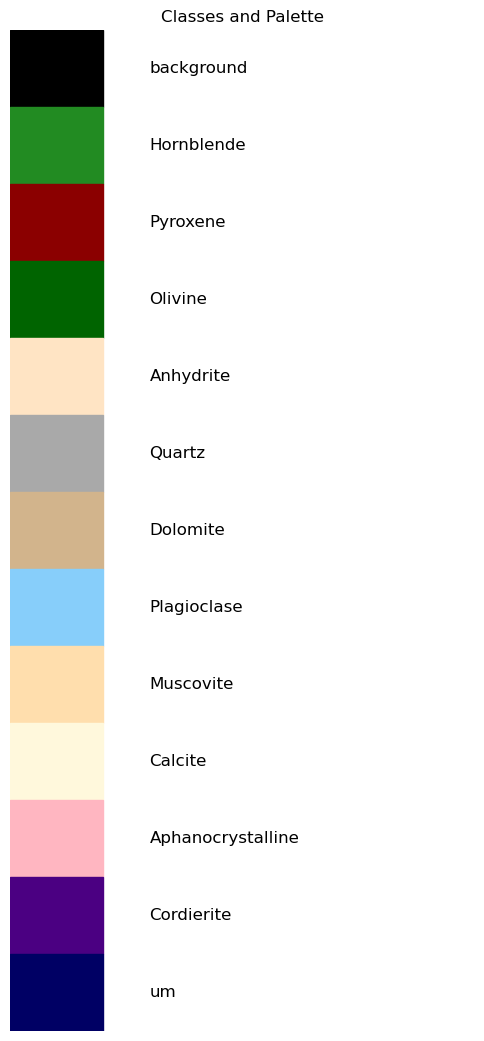

{'background': 0, 'Hornblende': 1, 'Pyroxene': 2, 'Olivine': 3, 'Anhydrite': 4, 'Quartz': 5, 'Dolomite': 6, 'Plagioclase': 7, 'Muscovite': 8, 'Calcite': 9, 'Aphanocrystalline': 10, 'Cordierite': 11, 'um': 12}
classes length 13
palette length 13


In [10]:

classes = Config.Classes_rocks

palette = Config.Palette_rocks

label_to_value = {name: idx for idx, name in enumerate(classes)}
if flas_show :
    # 创建可视化图像
    fig, ax = plt.subplots(figsize=(6, len(classes)))
    ax.set_axis_off()
    
    # 绘制每个类别的颜色块和标签
    for i, (cls, color) in enumerate(zip(classes, palette)):
        rect = plt.Rectangle((0, len(classes) - i - 1), 1, 1, color=np.array(color)/255)
        ax.add_patch(rect)
        ax.text(1.5, len(classes) - i - 0.5, cls, fontsize=12, verticalalignment='center')
    
    # 调整图像范围
    ax.set_xlim(0, 5)
    ax.set_ylim(0, len(classes))
    
    plt.title("Classes and Palette")
    plt.show()
print(label_to_value)
print(f"classes length {len(classes)}")
print(f"palette length {len(palette)}")


In [11]:
from Dataset.json_to_masks import process_folder_to_mask

#处理json  转化为掩码
process_folder_to_mask(input_folder, output_folder_mask, label_to_value, use_zeros=True)


The mask is processed and saved: 1-8-1-2.json


In [12]:
from Dataset.process_multiple_masks import process_multiple_masks

#统计和记录mask的信息，每张图片id种类及占比
process_multiple_masks(output_folder_mask, output_csv_mask)


All statistics have been saved to ./results/mask_class_distribution.csv


In [13]:
from Dataset.compute_class_distribution import compute_class_distribution

#统计全部mask类别id及占比
compute_class_distribution(output_folder_mask)



Find  1 images in the mask folder。
Total number of pixels: 1310720
Category ID Indicates the proportion of a category ID:
Category 0: Scale 0.0977%, Pixel number 1280
Category 5: Scale 99.1681%, Pixel number 1299816
Category 8: Scale 0.1006%, Pixel number 1319
Category 12: Scale 0.6336%, Pixel number 8305


In [14]:
from Dataset.fill_zero import process_masks

#填充空值，处理人为漏标、上色
process_masks(output_folder_mask, output_folder_color, palette,flag_fill=False)


paint : 100%|██████████| 1/1 [00:00<00:00, 11.39it/s]


In [16]:
from Dataset.copy_images_and_labels import copy_images_and_labels

#复制图像和mask到新文件夹output_floder，并整理文件格式
copy_images_and_labels(input_folder, output_folder_mask, output_floder)


All files are successfully copied to the ../data/traindata folder。


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [19]:
from Mineral_segmentation.Extraction_particle_sam import MaskGenerator

image_dir=os.path.join(output_floder,'images')
output_dir=os.path.join(output_floder,'sams')
mask_generator = MaskGenerator(image_dir,checkpoint=sam_checkpoint,device=device,output_folder=output_dir)

#进行sam分割
mask_generator.process_images()
# #移动图像
# mask_generator.move_sams()


Loading model 


D:\XueRenWorkplace\pycharmworkplace\SAMRocks\segment-anything-main\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f

Processing '../data/traindata\images\1-8-1-2.jpg'...1
Finished! - Process 1 images
